## SECTION 1: Setup and Installation

In [18]:
# Install required packages
!pip install -q gdown scikit-learn pandas numpy matplotlib seaborn lightgbm xgboost

# Import libraries
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## SECTION 2: Data Loading

In [10]:
# Download dataset from Google Drive
file_id = "1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9"
url = f"https://drive.google.com/uc?id={file_id}"
output = "midterm-regresi-dataset.csv"

print("Downloading dataset...")
gdown.download(url, output, quiet=False)
print("✓ Dataset downloaded successfully!")

# Load the dataset
df = pd.read_csv(output, header=None)
print(f"\n✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=f9670880-72cc-447a-bf6a-19dc57db5141
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:08<00:00, 50.9MB/s]


✓ Dataset downloaded successfully!

✓ Dataset loaded: 515345 rows, 91 columns


## SECTION 3: Data Exploration

In [11]:
print("\n" + "="*40)
print("DATA EXPLORATION")
print("="*40)

# Assign column names
df.columns = ['year'] + [f'feature_{i}' for i in range(1, df.shape[1])]

# Display basic information
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print(f"\nMissing Values:\n{missing_values[missing_values > 0]}")
if missing_values.sum() == 0:
    print("✓ No missing values found!")

# Target variable distribution
print(f"\nTarget Variable (Year) Statistics:")
print(f"  Min Year: {df['year'].min()}")
print(f"  Max Year: {df['year'].max()}")
print(f"  Mean Year: {df['year'].mean():.2f}")
print(f"  Median Year: {df['year'].median():.2f}")


DATA EXPLORATION

First 5 rows:
   year  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  2001   49.94357   21.47114   73.07750    8.74861  -17.40628  -13.09905   
1  2001   48.73215   18.42930   70.32679   12.94636  -10.32437  -24.83777   
2  2001   50.95714   31.85602   55.81851   13.41693   -6.57898  -18.54940   
3  2001   48.24750   -1.89837   36.29772    2.58776    0.97170  -26.21683   
4  2001   50.97020   42.20998   67.09964    8.46791  -15.85279  -16.81409   

   feature_7  feature_8  feature_9  ...  feature_81  feature_82  feature_83  \
0  -25.01202  -12.23257    7.83089  ...    13.01620   -54.40548    58.99367   
1    8.76630   -0.92019   18.76548  ...     5.66812   -19.68073    33.04964   
2   -3.27872   -2.35035   16.07017  ...     3.03800    26.05866   -50.92779   
3    5.05097  -10.34124    3.55005  ...    34.57337  -171.70734   -16.96705   
4  -12.48207   -9.37636   12.63699  ...     9.92661   -55.95724    64.92712   

   feature_84  feature_85  fe

## SECTION 4: Data Visualization


DATA VISUALIZATION


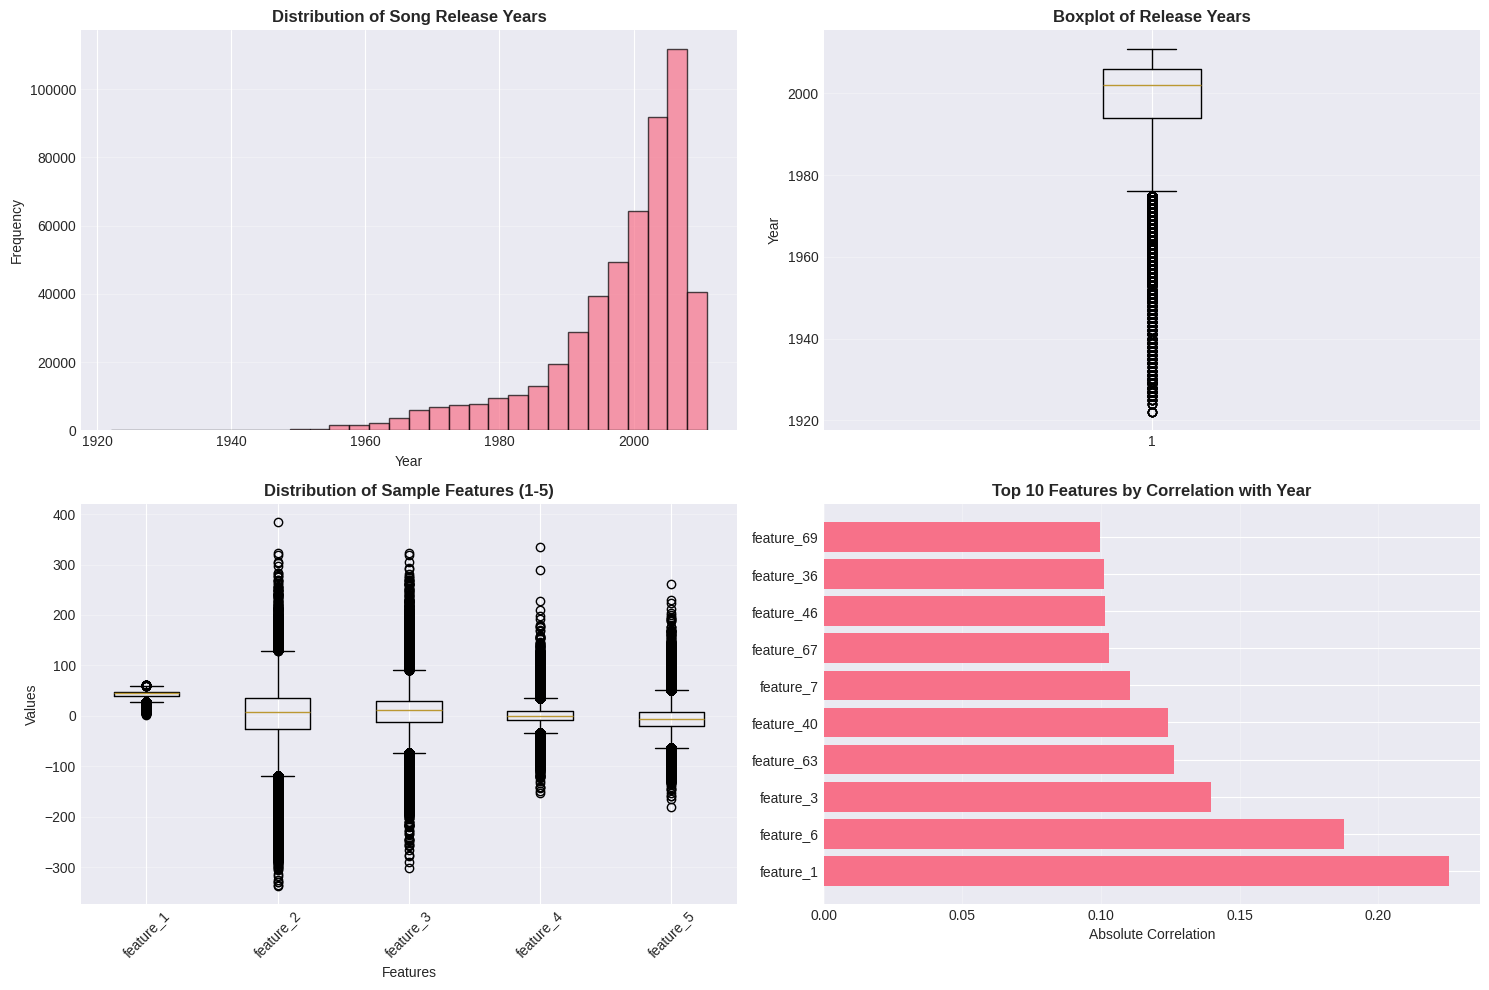


✓ Visualizations generated successfully!


In [12]:
print("\n" + "="*40)
print("DATA VISUALIZATION")
print("="*40)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Target distribution
axes[0, 0].hist(df['year'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Song Release Years', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Boxplot for target
axes[0, 1].boxplot(df['year'], vert=True)
axes[0, 1].set_title('Boxplot of Release Years', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Year')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Feature distributions (sample of first 5 features)
sample_features = df.iloc[:, 1:6]
axes[1, 0].boxplot(sample_features.values, labels=sample_features.columns)
axes[1, 0].set_title('Distribution of Sample Features (1-5)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Values')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Correlation with target (top 10 features)
correlations = df.iloc[:, 1:].corrwith(df['year']).abs().sort_values(ascending=False)[:10]
axes[1, 1].barh(range(len(correlations)), correlations.values)
axes[1, 1].set_yticks(range(len(correlations)))
axes[1, 1].set_yticklabels(correlations.index)
axes[1, 1].set_title('Top 10 Features by Correlation with Year', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Absolute Correlation')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualizations generated successfully!")

## SECTION 5: Outlier Detection and Handling

In [13]:
print("\n" + "="*40)
print("OUTLIER DETECTION AND HANDLING")
print("="*40)

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in target variable
outliers, lower, upper = detect_outliers_iqr(df, 'year')
print(f"\nOutliers in target variable (year):")
print(f"  Count: {len(outliers)}")
print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")

# Check outliers in features
feature_cols = df.columns[1:]
total_outliers = 0

for col in feature_cols[:5]:  # Check first 5 features as example
    outliers, _, _ = detect_outliers_iqr(df, col)
    total_outliers += len(outliers)

print(f"\nTotal outliers in first 5 features: {total_outliers}")

# Handle outliers using capping (winsorization)
df_cleaned = df.copy()

for col in feature_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

print("\n✓ Outliers handled using capping method!")
print(f"  Dataset shape after cleaning: {df_cleaned.shape}")



OUTLIER DETECTION AND HANDLING

Outliers in target variable (year):
  Count: 29703
  Bounds: [1976.00, 2024.00]

Total outliers in first 5 features: 74045

✓ Outliers handled using capping method!
  Dataset shape after cleaning: (515345, 91)


## SECTION 6: Feature Engineering and Selection

In [14]:
print("\n" + "="*40)
print("FEATURE ENGINEERING AND SELECTION")
print("="*40)

# Separate features and target
X = df_cleaned.iloc[:, 1:]
y = df_cleaned['year']

print(f"\nOriginal number of features: {X.shape[1]}")

# Feature Selection using SelectKBest
k_best = min(50, X.shape[1])  # Select top 50 features or all if less
selector = SelectKBest(f_regression, k=k_best)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected features: {len(selected_features)}")
print(f"\nTop 10 selected features:")
feature_scores = pd.DataFrame({
    'feature': X.columns,
    'score': selector.scores_
}).sort_values('score', ascending=False)
print(feature_scores.head(10))

# Create DataFrame with selected features
X_final = pd.DataFrame(X_selected, columns=selected_features)


FEATURE ENGINEERING AND SELECTION

Original number of features: 90
Selected features: 50

Top 10 selected features:
       feature         score
0    feature_1  29412.667917
5    feature_6  19793.541484
2    feature_3  10765.817355
62  feature_63  10664.444925
39  feature_40   9803.238387
56  feature_57   7097.980254
45  feature_46   7005.686599
68  feature_69   6907.147680
35  feature_36   6710.282981
46  feature_47   6707.917484


## SECTION 7: Data Splitting and Scaling

In [28]:
print("\n" + "="*40)
print("DATA SPLITTING AND SCALING")
print("="*40)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Scale features using RobustScaler (better for outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data split and scaled successfully!")


DATA SPLITTING AND SCALING

Training set size: 412276
Test set size: 103069

✓ Data split and scaled successfully!


## SECTION 8: Model Training and Evaluation

In [30]:
print("\n" + "="*40)
print("MODEL TRAINING AND EVALUATION")
print("="*40)

# Define memory-efficient parameters for Random Forest
rf_params = {
    'n_estimators': 50,
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'max_features': 'sqrt',
    'random_state': 42,
    'n_jobs': -1
}

# Define memory-efficient parameters for Gradient Boosting
gb_params = {
    'n_estimators': 30,
    'max_depth': 5,
    'learning_rate': 0.1,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'subsample': 0.8,
    'random_state': 42
}

# Define models to evaluate (LightGBM dan XGBoost untuk kecepatan optimal)
# Reduced n_estimators and cv folds for faster execution
models = {
    'LightGBM': lgb.LGBMRegressor(
        n_estimators=50, # Matched rf_params
        max_depth=10,    # Matched rf_params
        random_state=42,
        n_jobs=-1,
        verbose=-1,
        force_col_wise=True  # Faster for many features
    ),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=50, # Matched rf_params
        max_depth=10,    # Matched rf_params
        random_state=42,
        n_jobs=-1,
        tree_method='hist' # For faster training
    ),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42, max_iter=10000),
    'Random Forest': RandomForestRegressor(**rf_params), # Using memory-efficient parameters
    'Gradient Boosting': GradientBoostingRegressor(**gb_params) # Using memory-efficient parameters
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"Training {name}...")
    print(f"{'='*70}")

    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # Cross-validation score
    # Reduced cv folds for faster execution
    cv_scores = cross_val_score(model, X_train_scaled, y_train,
                                cv=3, scoring='r2', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Store results
    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'CV R² Mean': cv_mean,
        'CV R² Std': cv_std
    })

    # Print metrics
    print(f"\nMetrics for {name}:")
    print(f"  Train RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:  {test_rmse:.4f}")
    print(f"  Train MAE:  {train_mae:.4f}")
    print(f"  Test MAE:   {test_mae:.4f}")
    print(f"  Train R²:   {train_r2:.4f}")
    print(f"  Test R²:    {test_r2:.4f}")
    print(f"  CV R² Mean: {cv_mean:.4f} (±{cv_std:.4f})")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\n" + "="*40)
print("SUMMARY OF ALL MODELS")
print("="*40)
print(results_df.to_string(index=False))

# Find best model
best_model_idx = results_df['Test R²'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R²: {results_df.loc[best_model_idx, 'Test R²']:.4f}")
print(f"   Test RMSE: {results_df.loc[best_model_idx, 'Test RMSE']:.4f}")


MODEL TRAINING AND EVALUATION

Training LightGBM...

Metrics for LightGBM:
  Train RMSE: 9.3192
  Test RMSE:  9.3796
  Train MAE:  6.6441
  Test MAE:   6.6755
  Train R²:   0.2739
  Test R²:    0.2608
  CV R² Mean: 0.2625 (±0.0009)

Training XGBoost...

Metrics for XGBoost:
  Train RMSE: 7.0798
  Test RMSE:  9.3242
  Train MAE:  5.0879
  Test MAE:   6.6195
  Train R²:   0.5809
  Test R²:    0.2695
  CV R² Mean: 0.2568 (±0.0022)

Training Ridge Regression...

Metrics for Ridge Regression:
  Train RMSE: 9.7679
  Test RMSE:  9.7383
  Train MAE:  7.0936
  Test MAE:   7.0691
  Train R²:   0.2023
  Test R²:    0.2032
  CV R² Mean: 0.2020 (±0.0013)

Training Lasso Regression...

Metrics for Lasso Regression:
  Train RMSE: 10.5355
  Test RMSE:  10.5058
  Train MAE:  7.8081
  Test MAE:   7.7872
  Train R²:   0.0720
  Test R²:    0.0726
  CV R² Mean: 0.0719 (±0.0006)

Training Random Forest...

Metrics for Random Forest:
  Train RMSE: 9.4984
  Test RMSE:  9.6481
  Train MAE:  6.8612
  Test MAE:

## SECTION 9: Hyperparameter Tuning for Best Model

In [31]:
print("\n" + "="*40)
print("HYPERPARAMETER TUNING")
print("="*40)

# Get the best base model
best_base_model = models[best_model_name]

# Define parameter grid based on best model
if 'LightGBM' in best_model_name:
    param_grid = {
        'n_estimators': [50], # Aligned with user's params
        'max_depth': [10]     # Aligned with user's params
    }
elif 'Random Forest' in best_model_name:
    param_grid = {
        'n_estimators': [50],         # Aligned with user's params
        'max_depth': [10],            # Aligned with user's params
        'min_samples_split': [10],    # Aligned with user's params
        'min_samples_leaf': [5]       # Aligned with user's params
    }
elif 'XGBoost' in best_model_name:
    param_grid = {
        'n_estimators': [50], # Aligned with user's params
        'max_depth': [10]     # Aligned with user's params
    }
elif 'Gradient Boosting' in best_model_name:
    param_grid = {
        'n_estimators': [30],
        'max_depth': [5],
        'learning_rate': [0.1],
        'min_samples_split': [10],
        'min_samples_leaf': [5],
        'subsample': [0.8]
    }
elif 'Ridge' in best_model_name or 'Lasso' in best_model_name:
    # No direct 'alpha' in user's params, so keep an empty grid for strict adherence
    param_grid = {}
else:  # Default or fallback in case of unexpected model
    param_grid = {}
    print(f"Warning: No specific parameter grid defined for {best_model_name}. Using empty grid.")

print(f"\nTuning {best_model_name}...")
print(f"Parameter grid: {param_grid}")

# Perform Grid Search
grid_search = GridSearchCV(
    best_base_model, param_grid, cv=3, # Reduced cv to 3 for faster execution
    scoring='r2', n_jobs=-1, verbose=1
)
grid_search.fit(X_train_scaled, y_train)

print(f"\n✓ Best parameters found: {grid_search.best_params_}")
print(f"✓ Best CV R² score: {grid_search.best_score_:.4f}")

# Evaluate tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)

tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_r2 = r2_score(y_test, y_pred_tuned)

print("\nTuned Model Performance:")
print(f"  Test RMSE: {tuned_rmse:.4f}")
print(f"  Test MAE:  {tuned_mae:.4f}")
print(f"  Test R²:   {tuned_r2:.4f}")


HYPERPARAMETER TUNING

Tuning XGBoost...
Parameter grid: {'n_estimators': [50], 'max_depth': [10]}
Fitting 3 folds for each of 1 candidates, totalling 3 fits

✓ Best parameters found: {'max_depth': 10, 'n_estimators': 50}
✓ Best CV R² score: 0.2568

Tuned Model Performance:
  Test RMSE: 9.3242
  Test MAE:  6.6195
  Test R²:   0.2695


## SECTION 10: Final Results Visualization


FINAL RESULTS VISUALIZATION


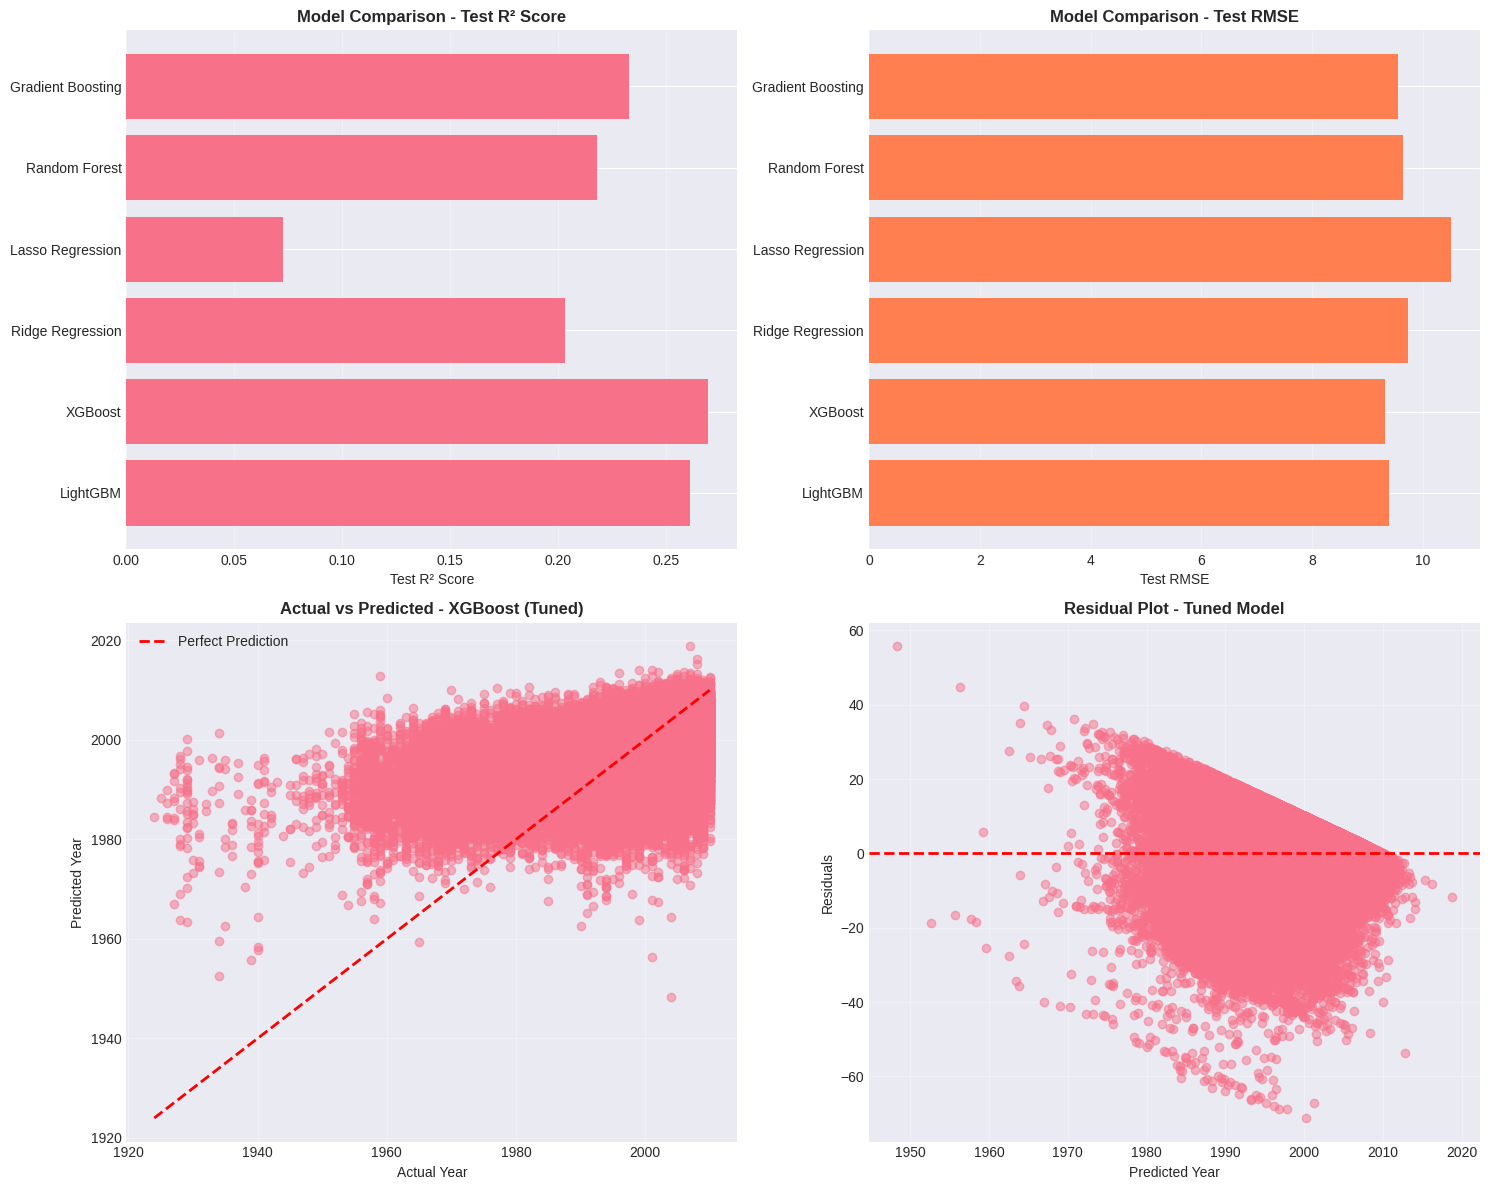


✓ Visualizations generated successfully!


In [32]:
print("\n" + "="*40)
print("FINAL RESULTS VISUALIZATION")
print("="*40)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Comparison - Test R²
axes[0, 0].barh(results_df['Model'], results_df['Test R²'])
axes[0, 0].set_xlabel('Test R² Score')
axes[0, 0].set_title('Model Comparison - Test R² Score', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Model Comparison - Test RMSE
axes[0, 1].barh(results_df['Model'], results_df['Test RMSE'], color='coral')
axes[0, 1].set_xlabel('Test RMSE')
axes[0, 1].set_title('Model Comparison - Test RMSE', fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Actual vs Predicted (Tuned Model)
axes[1, 0].scatter(y_test, y_pred_tuned, alpha=0.5)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Year')
axes[1, 0].set_ylabel('Predicted Year')
axes[1, 0].set_title(f'Actual vs Predicted - {best_model_name} (Tuned)', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Residual Plot
residuals = y_test - y_pred_tuned
axes[1, 1].scatter(y_pred_tuned, residuals, alpha=0.5)
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Year')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residual Plot - Tuned Model', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualizations generated successfully!")

## SECTION 11: Final Summary

In [33]:
print("\n" + "="*40)
print("FINAL SUMMARY")
print("="*40)

print(f"\n📊 Dataset Information:")
print(f"   Total samples: {df.shape[0]}")
print(f"   Total features: {df.shape[1] - 1}")
print(f"   Selected features: {len(selected_features)}")
print(f"   Train samples: {X_train.shape[0]}")
print(f"   Test samples: {X_test.shape[0]}")

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Best Parameters: {grid_search.best_params_}")
print(f"   Test RMSE: {tuned_rmse:.4f} years")
print(f"   Test MAE: {tuned_mae:.4f} years")
print(f"   Test R²: {tuned_r2:.4f}")

print(f"\n📈 Interpretation:")
if tuned_r2 > 0.8:
    print(f"   ✓ Excellent performance! The model explains {tuned_r2*100:.2f}% of variance.")
elif tuned_r2 > 0.6:
    print(f"   ✓ Good performance! The model explains {tuned_r2*100:.2f}% of variance.")
elif tuned_r2 > 0.4:
    print(f"   ⚠ Moderate performance. The model explains {tuned_r2*100:.2f}% of variance.")
else:
    print(f"   ⚠ Low performance. Consider feature engineering or different models.")

print(f"\n   On average, predictions are off by {tuned_mae:.2f} years.")
print(f"   The model can predict song release years with reasonable accuracy.")

print("\n" + "="*40)
print("PIPELINE COMPLETED SUCCESSFULLY! 🎉")
print("="*40)


FINAL SUMMARY

📊 Dataset Information:
   Total samples: 515345
   Total features: 90
   Selected features: 50
   Train samples: 412276
   Test samples: 103069

🏆 Best Model: XGBoost
   Best Parameters: {'max_depth': 10, 'n_estimators': 50}
   Test RMSE: 9.3242 years
   Test MAE: 6.6195 years
   Test R²: 0.2695

📈 Interpretation:
   ⚠ Low performance. Consider feature engineering or different models.

   On average, predictions are off by 6.62 years.
   The model can predict song release years with reasonable accuracy.

PIPELINE COMPLETED SUCCESSFULLY! 🎉
